# FRAUDULENT TRANSACTIONS ANALYSIS AND PREDICTIVE MODEL

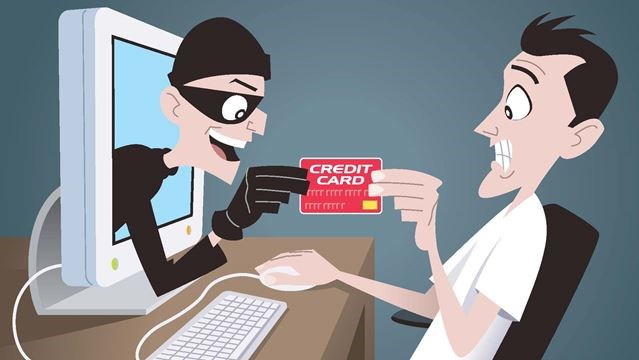

Welcome to <b>the fraudulent online transactions analysis and predictive model</b>. FinTech Bank is facing a rise in online fraud. To tackle this, they're planning to upgrade their fraud detection system to protect their customers and prevent financial losses. This analysis provides a holistic understanding of fraudulent transaction characteristics and enables us to identify the optimal predictive model using Machine Learning algorithms

## Materials and methods

<p>A dataset of online transactions, encompassing both legitimate and fraudulent activities, has been compiled. This dataset is divided into three separate tables: customers, transactions, and merchants. </p>
<p>
Our objectives involve transforming disorganized data into suitable formats for analysis, aiming to address pivotal inquiries such as:</p>
<ul>
<li><i>What is the distribution of normal transactions and fraudulent transactions?</i></li>
<li><i>What are the characteristics of fraudulent online transactions? </i></li>
<li><i>Which Machine Learning algorithm is best to use to build a predictive model for preventing fraudulent transactions? </i></li>
</ul>
<p>
In addition, we construct data visualization charts to maximize the efficacy of our analyzed findings </p>

## Outline

<p>1. Importing Needed Libraries </p>
<p>2. Importing and Joining Data </p>
<p>3. Cleaning Data </p>
4. Exploratory Data Analysis (EDA)
<p><ul>
<li><i>4.1. Fraud Status Proprotion</i></li>
<li><i>4.2. Comparison the mean values of descriptive statistics</i></li>
<li><i>4.4. Fraudulent Transactions Characteristics</i></li>
</ul>
</p>
5. The predictive model using Machine Learning algorithm
<p><ul>
<li><i>5.1. Logistics Regression using SMOTE </i></li>
<li><i>5.2. Random Forest using SMOTE</i></li>
<li><i>5.2. Chosen algorithm</i></li>
</ul>
</p>
6. Recommendations

***

## 1. Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing necessary encoder and progress bar libraries
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm


# necessary scalers for feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler


# handling imbalanced datasets and performing resampling techniques
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# data splitting, model evaluation metrics, cross-validation, hyperparameter tuning, and classification performance
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve


# necessary classifiers for building machine learning models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## 2. Importing And Joining Data

In [3]:
# Import three seperated datasets
transactions_df = pd.read_csv('../Data/ds_transactions.csv')
customers_df = pd.read_csv('../Data/ds_customers.csv')
merchants_df = pd.read_csv('../Data/ds_merchants.csv')

In [4]:
# Merge transactions_df and customers_df on 'customer_id'
merged_df = pd.merge(transactions_df, customers_df, on='customer_id', how='left')

# Merge the result with merchants_df on 'merchant_id'
final_df = pd.merge(merged_df, merchants_df, on='merchant_id', how='left')

# Reading the dataset and displaying the first five entries
final_df.head()

,transaction_id,customer_id,transaction_timestamp,transaction_amount,transaction_type,payment_method,account_balance_before,account_balance_after,transaction_device,ip_address,user_agent,is_fraud,merchant_id,account_age,customer_demographics,merchant_category
0,1,115,2022-12-21,392.44,transfer,debit card,7032.36,7424.80,tablet,7.53.209.71,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,1,NaN,668.0,NaN,NaN
1,2,2395,2021-12-11,594.18,deposit,debit card,11503.03,12097.21,mobile,108.229.29.188,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.6.20) G...,0,NaN,1023.0,NaN,NaN
2,3,2082,2022-04-11,6363.16,transfer,credit card,16073.25,22436.41,desktop,148.218.101.152,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_9_1...,1,NaN,1843.0,NaN,NaN
3,4,315,2022-09-24,2834.45,deposit,debit card,16938.44,19772.89,mobile,14.38.239.68,Mozilla/5.0 (Windows 98) AppleWebKit/533.1 (KH...,0,NaN,132.0,NaN,NaN
4,5,2055,2021-08-11,4117.41,deposit,credit card,8686.47,12803.88,desktop,1.93.31.164,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...,0,NaN,1579.0,NaN,NaN


## 3. Cleaning Data

In [5]:
# Overview the merged final dataset information
print(final_df.info())
print(final_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1000000 non-null  int64  
 1   customer_id             1000000 non-null  int64  
 2   transaction_timestamp   996238 non-null   object 
 3   transaction_amount      1000000 non-null  float64
 4   transaction_type        1000000 non-null  object 
 5   payment_method          1000000 non-null  object 
 6   account_balance_before  1000000 non-null  float64
 7   account_balance_after   1000000 non-null  float64
 8   transaction_device      1000000 non-null  object 
 9   ip_address              1000000 non-null  object 
 10  user_agent              1000000 non-null  object 
 11  is_fraud                1000000 non-null  int64  
 12  merchant_id             249708 non-null   float64
 13  account_age             999613 non-null   float64
 14  cus

In [6]:
# Display a heatmap to visualize missing values in a dataframe

def display_missing_values_heatmap(dataframe, figsize=(6, 3), cmap='viridis', fontsize=12):

    plt.figure(figsize=figsize)
    sns.heatmap(dataframe.isnull(), cmap=cmap)
    plt.title("Missing Values Heatmap", fontsize=fontsize)
    plt.xlabel("Columns", fontsize=fontsize)
    plt.ylabel("Rows", fontsize=fontsize)
    plt.show()

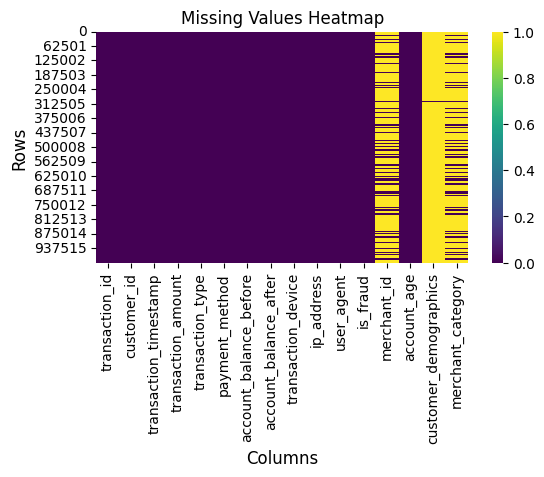

In [7]:
display_missing_values_heatmap(final_df)

From the heatmap chart, it can be seen that there are three columns with overwhelming missing values, including `merchant_id`, `customer_dempgraphics` and `merchant_category`. However, we skipped dropping the missing values from them because they are not considered as main factors in the analysis. The missing values from `transaction_timestamp` and `account_age` should be removed.

In [8]:
# Remove rows with missing values in 'date' and 'age' columns
final_df.dropna(subset=['transaction_timestamp', 'account_age'], inplace=True)

# Review the new dataset shape and check if there are any missing values from the key factors
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995853 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   transaction_id          995853 non-null  int64  
 1   customer_id             995853 non-null  int64  
 2   transaction_timestamp   995853 non-null  object 
 3   transaction_amount      995853 non-null  float64
 4   transaction_type        995853 non-null  object 
 5   payment_method          995853 non-null  object 
 6   account_balance_before  995853 non-null  float64
 7   account_balance_after   995853 non-null  float64
 8   transaction_device      995853 non-null  object 
 9   ip_address              995853 non-null  object 
 10  user_agent              995853 non-null  object 
 11  is_fraud                995853 non-null  int64  
 12  merchant_id             248630 non-null  float64
 13  account_age             995853 non-null  float64
 14  customer_demographics   1

Now we need to check the distributions of numeric fields

In [9]:
final_df.describe()

,transaction_id,customer_id,transaction_amount,account_balance_before,account_balance_after,is_fraud,merchant_id,account_age
count,995853.000000,995853.000000,995853.000000,995853.000000,995853.000000,995853.000000,248630.00000,995853.000000
mean,499984.560062,1250.306923,4956.127196,9928.036613,9926.323061,0.050009,125.19626,1012.562041
std,288668.656880,721.683402,2953.421765,5902.170710,8254.568847,0.217964,72.15794,570.524599
min,1.000000,1.000000,-9996.030000,-19999.940000,-29866.630000,0.000000,1.00000,32.000000
25%,249982.000000,625.000000,2466.860000,4949.420000,4078.600000,0.000000,63.00000,516.000000
50%,500006.000000,1251.000000,4979.120000,9968.920000,9971.440000,0.000000,125.00000,1009.000000
75%,749958.000000,1875.000000,7484.800000,14981.210000,15831.130000,0.000000,188.00000,1510.000000
max,1000000.000000,2499.000000,9999.980000,20000.000000,29994.320000,1.000000,250.00000,2000.000000


There are not any suspicious values or outliers recorded in this dataset. It's important to consider `transaction_amount` with negative amounts. However, negative transaction amounts might represent refunds, chargebacks, or other legitimate financial transactions.

## 4. Exploratory Data Analysis

### 4.1. Fraud Status Proportion
<p> First of all, we need to look at how many the fraudulent and non-fraudulent are:

is_fraud
0    946051
1     49802
Name: count, dtype: int64


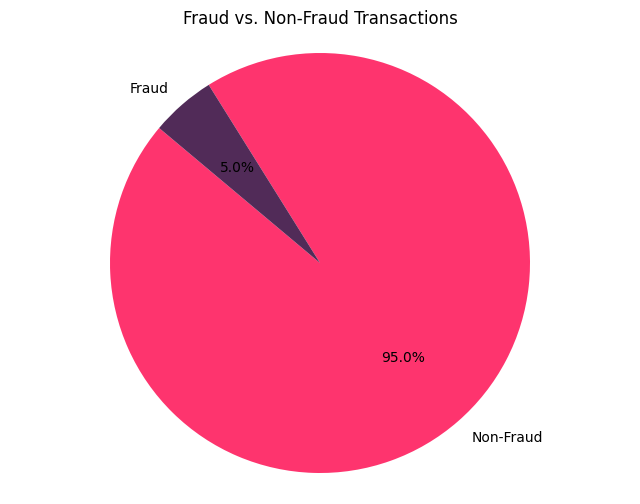

In [10]:
# Group the DataFrame by the 'is_fraud' column and count the occurrences of each value
fraud_counts = final_df['is_fraud'].value_counts()
print(fraud_counts)
# Define custom labels
labels = ['Non-Fraud', 'Fraud']
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=('#fe346e','#512b58'))
plt.title('Fraud vs. Non-Fraud Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 4.2. Comparison the mean values of descriptive statistics

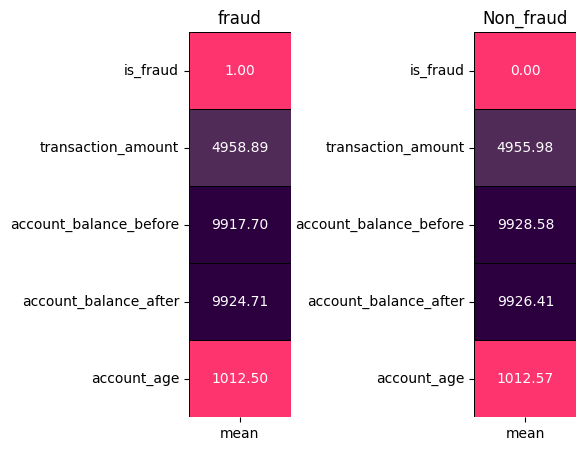

In [11]:
# Comparing the mean values of descriptive statistics for the 'y=1' (Fraud) and 'y=0' (Non-fraud) groups using heatmaps
numeric_cols = final_df[['is_fraud','transaction_amount','account_balance_before','account_balance_after','account_age']]

fraud = numeric_cols[numeric_cols['is_fraud'] == 1].describe().T
non_fraud = numeric_cols[numeric_cols['is_fraud'] == 0].describe().T

colors = ['#fe346e','#512b58','#2c003e']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(fraud[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('fraud')

plt.subplot(1,2,2)
sns.heatmap(non_fraud[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Non_fraud')
plt.subplots_adjust(wspace=1.8) # Adjust the spacing between 2 subplots



It can be seen that there is no significant difference in the average value between fraudulent transactions and successful transactions.

### 4.3. Fraudulent Transactions Characteristics
#### a. Fraudulent Transactions by Transactions Amount

In [12]:
# Calculate quantiles
quantiles = final_df['transaction_amount'].quantile([0.25, 0.5, 0.75])

# Define categories based on quantiles in reverse order
category_labels = ['Low', 'Medium-Low', 'Medium-High', 'High']

# Assign category labels based on quantiles
final_df['amount_category'] = pd.qcut(final_df['transaction_amount'], q=[0, 0.25, 0.5, 0.75, 1], labels=category_labels)

# Show the quantile values of the transaction_amount
print(final_df['transaction_amount'].describe())

# Display the breakdown
print(final_df[['transaction_amount', 'amount_category']].head())


count    995853.000000
mean       4956.127196
std        2953.421765
min       -9996.030000
25%        2466.860000
50%        4979.120000
75%        7484.800000
max        9999.980000
Name: transaction_amount, dtype: float64
   transaction_amount amount_category
0              392.44             Low
1              594.18             Low
2             6363.16     Medium-High
3             2834.45      Medium-Low
4             4117.41      Medium-Low


amount_category
Low            12540
Medium-Low     12350
Medium-High    12441
High           12471
Name: count, dtype: int64


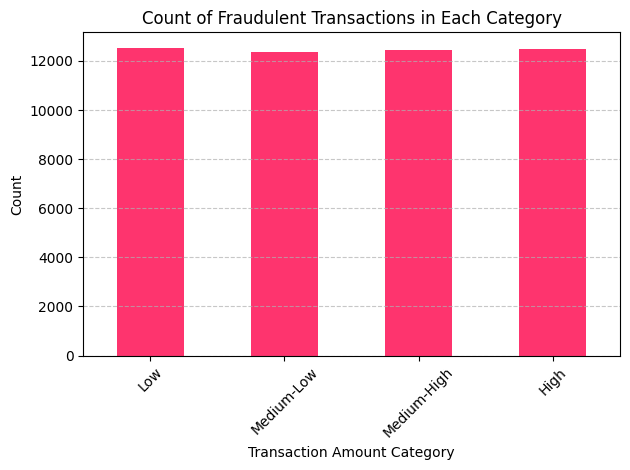

In [13]:
# Determine the dataset of only fraudulent transaction
fraudulent_transactions = final_df[final_df['is_fraud'] == 1]
# Calculate the count of fraudulent transactions in each category
fraudulent_transaction_counts = fraudulent_transactions['amount_category'].value_counts().reindex(category_labels)
print(fraudulent_transaction_counts)
# Plotting the bar chart
fraudulent_transaction_counts.plot(kind='bar', color='#fe346e')
plt.title('Count of Fraudulent Transactions in Each Category')
plt.xlabel('Transaction Amount Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

There is no difference in the number of fraudulent transactions amongst the transaction amount categories

### b. Fraudulent Transaction by Weekdays and Months

In [14]:
# Convert 'transaction_timestamp' column to datetime format
final_df['transaction_timestamp'] = pd.to_datetime(final_df['transaction_timestamp'])

# Extract weekday and month from 'transaction_timestamp' column
final_df['weekday'] = final_df['transaction_timestamp'].dt.weekday.map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
final_df['month'] = final_df['transaction_timestamp'].dt.month

# Display the DataFrame with new columns
print(final_df[['transaction_timestamp', 'weekday', 'month']].head())

  transaction_timestamp    weekday  month
0            2022-12-21  Wednesday     12
1            2021-12-11   Saturday     12
2            2022-04-11     Monday      4
3            2022-09-24   Saturday      9
4            2021-08-11  Wednesday      8


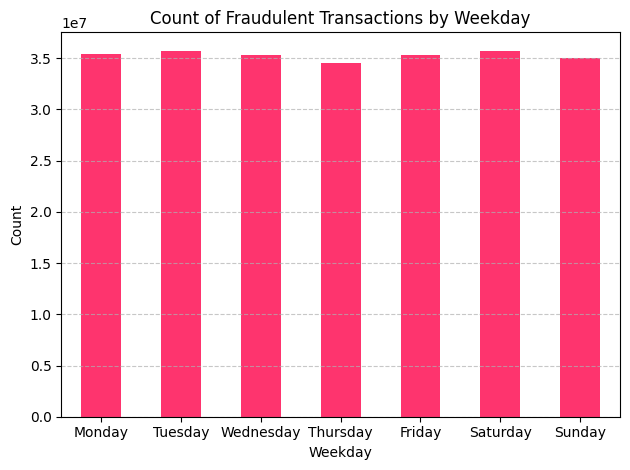

In [15]:
# Determine the dataset of only fraudulent transaction
fraudulent_transactions = final_df[final_df['is_fraud'] == 1]

# Count fraudulent transactions by weekday
fraudulent_transactions_by_weekday = fraudulent_transactions.groupby('weekday')['transaction_amount'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# Plotting the bar chart
fraudulent_transactions_by_weekday.plot(kind='bar', color='#fe346e')
plt.title('Count of Fraudulent Transactions by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

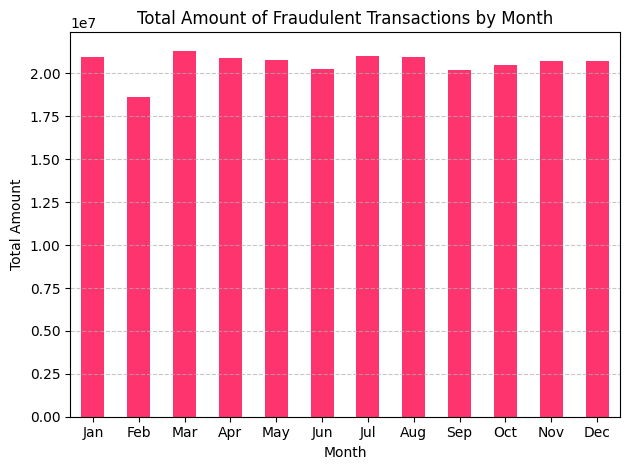

In [16]:
fraudulent_transactions_by_month = fraudulent_transactions.groupby('month')['transaction_amount'].sum()

# Reindex the series to ensure that all months are present and in the correct order
fraudulent_transactions_by_month = fraudulent_transactions_by_month.reindex(range(1, 13), fill_value=0)

# Plotting the bar chart
fraudulent_transactions_by_month.plot(kind='bar', color='#fe346e')
plt.title('Total Amount of Fraudulent Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)  # Set x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

There is not much difference between the total transaction_amount amongst weekdays and amongst months

### c. Fraudulent Transaction by Account Age

In [17]:
# Calculate quantiles
quantiles = fraudulent_transactions['account_age'].quantile([0.25, 0.5, 0.75])

# Define categories based on quantiles
category_labels = ['New', 'Regular', 'Established', 'Old']

# Assign category labels based on quantiles
fraudulent_transactions['account_age_category'] = pd.qcut(fraudulent_transactions['account_age'], q=[0, 0.25, 0.5, 0.75, 1], labels=category_labels)

# Display the breakdown
print(fraudulent_transactions[['account_age', 'account_age_category']].head())

   account_age account_age_category
0        668.0              Regular
2       1843.0                  Old
5        567.0              Regular
6        514.0                  New
8        361.0                  New


/var/folders/yj/9lxgd5cs7l58ybjjzq1v4bwc0000gn/T/ipykernel_19720/3827051177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_transactions['account_age_category'] = pd.qcut(fraudulent_transactions['account_age'], q=[0, 0.25, 0.5, 0.75, 1], labels=category_labels)


account_age_category
New            12469
Regular        12466
Old            12445
Established    12422
Name: count, dtype: int64


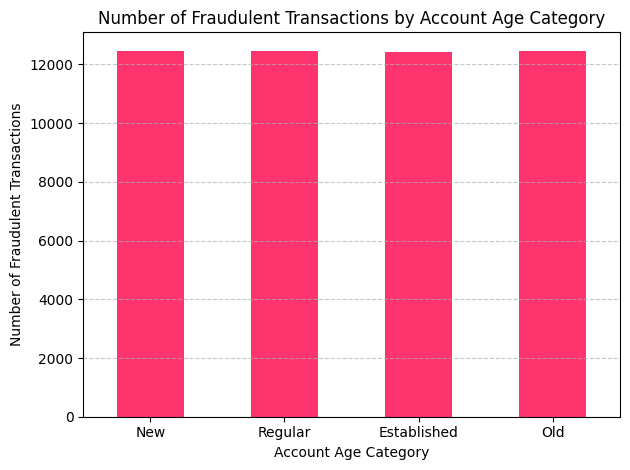

In [18]:
# Count fraudulent transactions by account age category
fraudulent_transactions_by_account_age_category = fraudulent_transactions['account_age_category'].value_counts()
print(fraudulent_transactions_by_account_age_category)
# Sort the series by category labels
fraudulent_transactions_by_account_age_category = fraudulent_transactions_by_account_age_category.reindex(category_labels)

# Plotting the bar chart
fraudulent_transactions_by_account_age_category.plot(kind='bar', color='#fe346e')
plt.title('Number of Fraudulent Transactions by Account Age Category')
plt.xlabel('Account Age Category')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### d. Fraudulent Transaction by Categorical Fields

/var/folders/yj/9lxgd5cs7l58ybjjzq1v4bwc0000gn/T/ipykernel_19720/2614359952.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_transactions[column] = fraudulent_transactions[column].str.strip().str.lower()
/var/folders/yj/9lxgd5cs7l58ybjjzq1v4bwc0000gn/T/ipykernel_19720/2614359952.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_transactions[column] = fraudulent_transactions[column].str.strip().str.lower()
/var/folders/yj/9lxgd5cs7l58ybjjzq1v4bwc0000gn/T/ipykernel_19720/261435995

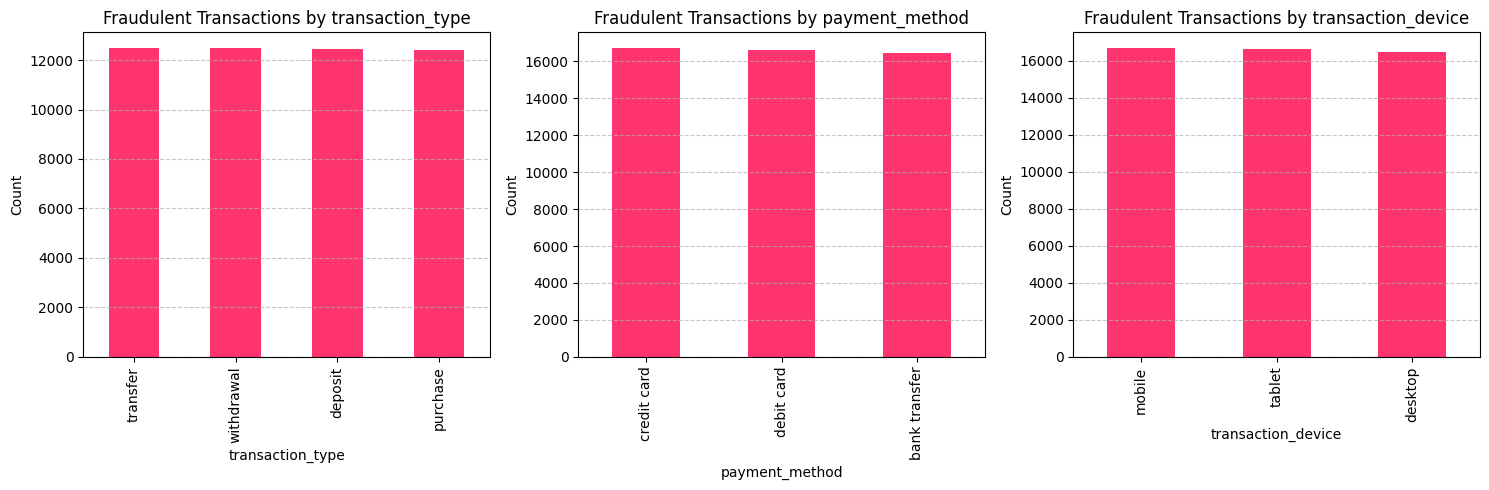

In [19]:
# Define categorical columns
categorical_columns = ['transaction_type', 'payment_method', 'transaction_device']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot each categorical column
for i, column in enumerate(categorical_columns):
    # Clean up categorical data by removing leading and trailing whitespaces and converting to lowercase
    fraudulent_transactions[column] = fraudulent_transactions[column].str.strip().str.lower()
    
    # Plot the cleaned data
    fraudulent_transactions[column].value_counts().plot(kind='bar', ax=axes[i], color='#fe346e')
    
    # Set plot titles and labels
    axes[i].set_title(f'Fraudulent Transactions by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for y-axis

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

From the multi-plot chart, we can see these categorical fields do not impact the fraudulent activities.

### e. Fraudulent Transaction by User Agent

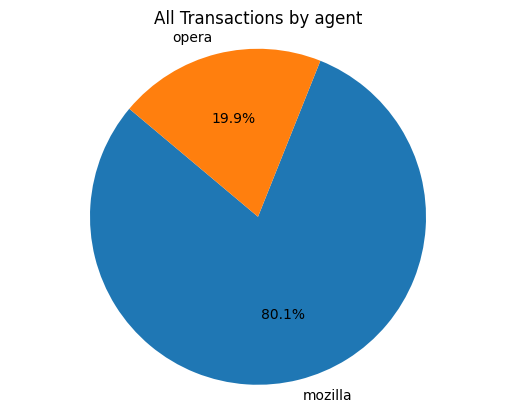

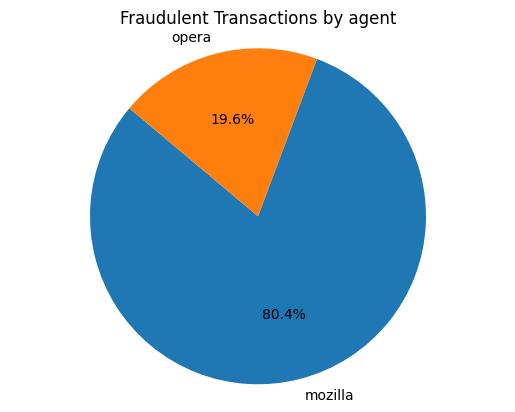

In [20]:
# Apply the extraction operation for the entire 'user_agent' column
final_df['agent_category'] = final_df['user_agent'].apply(lambda x: x.split('/')[0])

# Count the number of all transactions by agent
agent = final_df['agent_category'].str.lower().value_counts()
# Plot the pie chart for the number of all transactions by agent
agent.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('All Transactions by agent')
plt.ylabel('')  # Remove y-axis label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# Determine the dataset of only fraudulent transaction
fraudulent_transactions = final_df[final_df['is_fraud'] == 1]
# Count the number of fraudulent transactions by substring
agent_counts = fraudulent_transactions['agent_category'].str.lower().value_counts()
# Plot the pie chart
agent_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Fraudulent Transactions by agent')
plt.ylabel('')  # Remove y-axis label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

It can be seen 80% of the fraudulent transactions were made through the Mozilla browser

### 5. Predictive model using ML algorithms
<p> As analyzed in section 4 (exploratory data analysis), no relationship could be found between fraudulent activities and  patterns. Therefore, using prediction models based on Machine Learning algorithms is necessary to automatically detect fraud patterns. </p>

As analyzed in section 4.1, the data is suffering from an <b>imbalanced dataset</b> with the number of fraudulent transactions recorded in only 5% of the sample. To tackle this challenge, one widely used approach is Synthetic Minority Oversampling Technique (SMOTE). SMOTE is tailor-made for handling imbalanced datasets by generating artificial samples for the minority class.

In [21]:
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 995853 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          995853 non-null  int64         
 1   customer_id             995853 non-null  int64         
 2   transaction_timestamp   995853 non-null  datetime64[ns]
 3   transaction_amount      995853 non-null  float64       
 4   transaction_type        995853 non-null  object        
 5   payment_method          995853 non-null  object        
 6   account_balance_before  995853 non-null  float64       
 7   account_balance_after   995853 non-null  float64       
 8   transaction_device      995853 non-null  object        
 9   ip_address              995853 non-null  object        
 10  user_agent              995853 non-null  object        
 11  is_fraud                995853 non-null  int64         
 12  merchant_id             248630 non-

To build Machine Leaning algorithms, the `object` typed columns need to be encoded or transformed into a numerical representation before feeding them into the model.

In [22]:
# List of categorical columns to encode
categorical_columns = ['transaction_type', 'payment_method', 'transaction_device','merchant_category','amount_category','weekday','agent_category']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over categorical columns and transform values
for column in categorical_columns:
    final_df[column] = label_encoder.fit_transform(final_df[column])

# Display the transformed DataFrame
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 995853 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   transaction_id          995853 non-null  int64         
 1   customer_id             995853 non-null  int64         
 2   transaction_timestamp   995853 non-null  datetime64[ns]
 3   transaction_amount      995853 non-null  float64       
 4   transaction_type        995853 non-null  int64         
 5   payment_method          995853 non-null  int64         
 6   account_balance_before  995853 non-null  float64       
 7   account_balance_after   995853 non-null  float64       
 8   transaction_device      995853 non-null  int64         
 9   ip_address              995853 non-null  object        
 10  user_agent              995853 non-null  object        
 11  is_fraud                995853 non-null  int64         
 12  merchant_id             248630 non-

In [23]:
# Define input variables (features)
X = final_df[['transaction_id', 'customer_id','transaction_amount', 'transaction_type', 'payment_method', 'account_balance_before',
               'account_balance_after', 'transaction_device', 'account_age','merchant_category',
               'amount_category','weekday','month','agent_category']]  # Select relevant columns as features

# Define output variable (target)
y = final_df['is_fraud']  # Assuming 'is_fraud' column represents the target variable


### 5.1. Logistic Regression Using SMOTE

In [24]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (995853, 14)
Shape of y: (995853,)


In [25]:
# Initializing a Logistic Regression classifier
model1 = LogisticRegression()
smote = SMOTE(random_state = 42)

X_temp, y = smote.fit_resample(X, y)
X = pd.DataFrame(X_temp, columns = X.columns)

In [26]:
# Create the training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2)

counter = Counter(y_train)
print(counter)

Counter({1: 757259, 0: 756422})


In [27]:
# Training, evaluating, and evaluating the performance of a Logistic Regression classifier model
model1.fit(X_train, y_train)
predictions = model1.predict(X_valid)
print(classification_report(y_valid, predictions))

/Users/admoat/Desktop/Fraud Detection/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.99      0.92      0.95    189629
           1       0.93      0.99      0.96    188792

    accuracy                           0.96    378421
   macro avg       0.96      0.96      0.96    378421
weighted avg       0.96      0.96      0.96    378421



<Axes: >

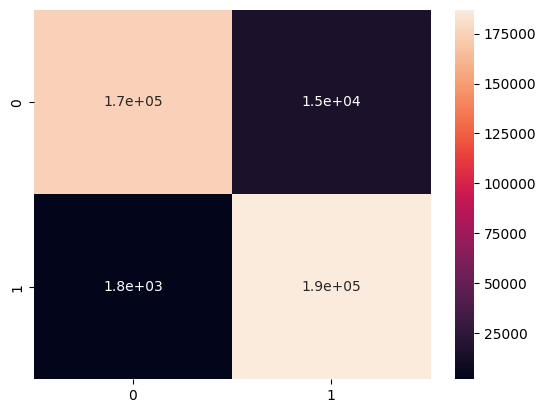

In [28]:
# Visualize the heatmap or the confusion matrix
sns.heatmap(confusion_matrix(y_valid, predictions), annot = True)

### 5.2. Random Forest Classifier Using SMOTE

In [29]:
# Initializing a Random Forest classifier
model1 = RandomForestClassifier()
smote = SMOTE(random_state = 42)
X_temp, y = smote.fit_resample(X, y)
X = pd.DataFrame(X_temp, columns = X.columns)

In [30]:
# Create the training and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.8, test_size = 0.2)

In [31]:
# Training, evaluating, and evaluating the performance of a Logistic Regression classifier model
model1.fit(X_train, y_train)

In [ ]:
predictions = model1.predict(X_valid)
print(classification_report(y_valid, predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    189298
           1       0.96      1.00      0.98    189123

    accuracy                           0.97    378421
   macro avg       0.98      0.97      0.97    378421
weighted avg       0.98      0.97      0.97    378421



<Axes: >

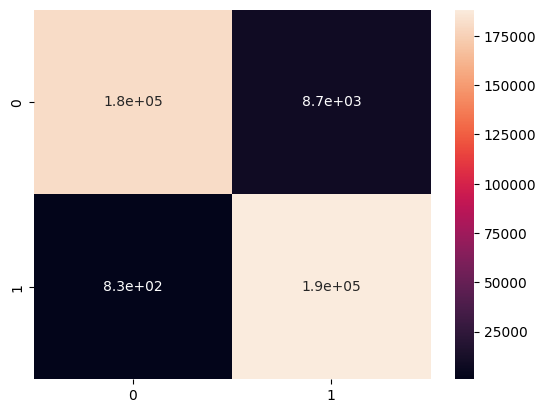

In [ ]:
# Visualize the heatmap for the confusion matrix
sns.heatmap(confusion_matrix(y_valid, predictions), annot = True)

### 5.3. Which algorithm is chosen?

From the training and testing results, it is easy to see Random Forest Classifier using SMOTE gives the higher precision, recall, f1 score, and accuracy of about 97%.
<p>The finding, just as in this case study, had the <b><i>Random Forest Algorithm</i></b> emerging as the more suitable algorithm for fraudulent credit card transaction detection and prediction.</p>

## 6. Recommendations

<p>In terms of <b>data scale</b>, there's a disparity within the dataset, with fraudulent transactions accounting for only 5% while non-fraudulent transactions make up 95%. To enhance the dataset's reliability and assist banks in uncovering hidden partterns, it's crucial to delve deeper into detecting fraudulent activities through increased scrutiny and recording.</p>
<p>In analyzing <b><i>suspicious behavior and potential signs of illegality</i></b>, no significant indicators were observed across various parameters such as total transaction amount, transaction time, account age, transaction type, and device, as well as payment method. The sole discrepancy lies in the choice of web browser, with 80% of fraudulent transactions occurring via Molliza. Consequently, banks should implement extra measures, including identity verification, for transactions conducted through this browser when deemed suspicious. </p>
<p> Therefore, using <b><i>Machine Learning </i></b> models is necessary to detect fraud. From this study, the Random Forest algorithm using SMOTE is suggested to predict and detect future fraudulent transactions.</p>